In [1]:
# 🚀 Auto-setup: installs deps + configures CFBD access
import os
import sys
from pathlib import Path

# Find _auto_setup.py regardless of current working directory
_current = Path().resolve()
_auto_setup_path = None
for parent in [_current] + list(_current.parents):
    candidate = parent / "starter_pack" / "_auto_setup.py"
    if candidate.exists():
        _auto_setup_path = candidate
        # Add project root to sys.path (auto_setup.py will also do this)
        if str(parent) not in sys.path:
            sys.path.insert(0, str(parent))
        break

if _auto_setup_path and _auto_setup_path.exists():
    # Execute the file directly without changing directory
    with open(_auto_setup_path, 'r') as f:
        exec(f.read(), {'__file__': str(_auto_setup_path)})
else:
    # Fallback: try relative path
    try:
        with open("./_auto_setup.py", 'r') as f:
            exec(f.read(), {'__file__': './_auto_setup.py'})
    except FileNotFoundError:
        print("⚠️  Could not find _auto_setup.py. Please run from starter_pack directory.")


ModuleNotFoundError: No module named 'starter_pack'

In [2]:
# 08_offense_vs_defense_comparison.ipynb
# ⚔️ Offense vs. Defense Matchup Explorer

# 🛠 Requirements:
# - pandas, matplotlib, seaborn (install via `pip install pandas matplotlib seaborn`)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

import sys
from pathlib import Path

# Import starter pack configuration system
_config_dir = Path().resolve() / "config"
if str(_config_dir.parent) not in sys.path:
    sys.path.insert(0, str(_config_dir.parent))
from config.data_config import get_starter_pack_config

# Get configuration
config = get_starter_pack_config()
current_year = config.current_year
DATA_DIR = str(config.data_dir)

plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = [15,8]


In [3]:
# 📂 Load {current_year} season advanced stats

stats_path = str(config.get_advanced_stats_path(year=current_year))
stats = pd.read_csv(stats_path)


In [4]:
# 🎛️ Choose matchup

offense_team = "Washington"
defense_team = "Michigan"

# Lookup rows
off_row = stats[stats["team"] == offense_team].squeeze()
def_row = stats[stats["team"] == defense_team].squeeze()

if off_row.empty or def_row.empty:
    raise ValueError("One or both teams not found in dataset.")

In [5]:
# Metrics to compare (offense vs. defense)
metric_pairs = [
    ("offense_ppa", "defense_ppa"),
    ("offense_successRate", "defense_successRate"),
    ("offense_explosiveness", "defense_explosiveness"),
    ("offense_standardDowns_ppa", "defense_standardDowns_ppa"),
    ("offense_passingDowns_ppa", "defense_passingDowns_ppa"),
    ("offense_lineYards", "defense_lineYards"),
    ("offense_stuffRate", "defense_stuffRate"),
]

labels = [m[0].replace("offense_", "").replace("_", " ") for m in metric_pairs]

off_values = [off_row[o] for o, _ in metric_pairs]
def_values = [def_row[d] for _, d in metric_pairs]

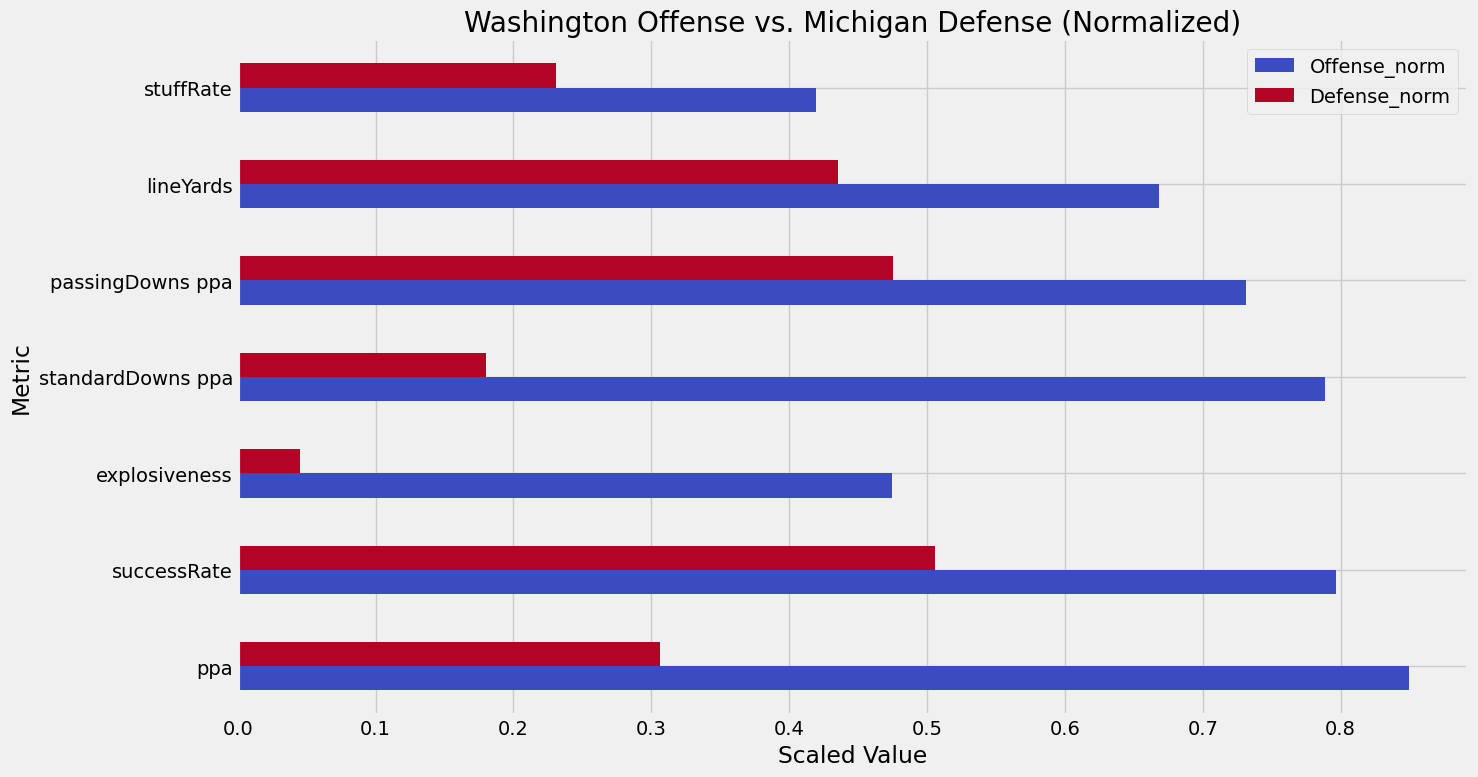

In [6]:
# Combine and normalize (min-max per metric for comparison)
from sklearn.preprocessing import MinMaxScaler
import numpy as np

data = pd.DataFrame({
    "Metric": labels,
    "Offense": off_values,
    "Defense": def_values
})

# Compute global min/max for each metric across all teams
off_metrics = [o for o, _ in metric_pairs]
def_metrics = [d for _, d in metric_pairs]

off_min = stats[off_metrics].min()
off_max = stats[off_metrics].max()
def_min = stats[def_metrics].min()
def_max = stats[def_metrics].max()

# Normalize selected teams' metrics based on global scale
off_norm = [(off_row[m] - off_min[m]) / (off_max[m] - off_min[m]) for m in off_metrics]
def_norm = [(def_row[m] - def_min[m]) / (def_max[m] - def_min[m]) for m in def_metrics]

# Prepare for display
data = pd.DataFrame({
    "Metric": labels,
    "Offense": [off_row[m] for m in off_metrics],
    "Defense": [def_row[m] for m in def_metrics],
    "Offense_norm": off_norm,
    "Defense_norm": def_norm
})

# Bar plot comparison
data.set_index("Metric")[["Offense_norm", "Defense_norm"]].plot(kind="barh", colormap="coolwarm")
plt.title(f"{offense_team} Offense vs. {defense_team} Defense (Normalized)")
plt.xlabel("Scaled Value")
plt.ylabel("Metric")
plt.tight_layout()
plt.show()

In [7]:
# Raw metric values side-by-side
data[["Metric", "Offense", "Defense"]]

,Metric,Offense,Defense
0,ppa,0.337486,0.064781
1,successRate,0.513514,0.407351
2,explosiveness,1.241458,1.057261
3,standardDowns ppa,0.282461,-0.050666
4,passingDowns ppa,0.494797,0.341975
5,lineYards,3.127795,2.634000
6,stuffRate,0.178248,0.170000


In [8]:
# ✅ Summary

# In this notebook, you:
# - Selected two teams (one offense, one defense)
# - Compared performance across key efficiency metrics
# - Visualized mismatches using normalized comparisons

# 🧪 Try This:
# - Swap roles (e.g., DEF vs. OFF the other way)
# - Add additional metrics (e.g., havoc, field position)
# - Combine with matchup predictor or similarity tools